<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [121]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [8]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [9]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_followees', 'preferential_followers', 'svd_dot'],
      dtype='object')

In [10]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [11]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9121912812862589 test Score 0.8810743046554618
Estimators =  50 Train Score 0.9204834803936853 test Score 0.894983164270134
Estimators =  100 Train Score 0.921502203009394 test Score 0.9129945387084671
Estimators =  150 Train Score 0.9210091027308193 test Score 0.9159593942419704
Estimators =  200 Train Score 0.9210838731176973 test Score 0.9155437069127113
Estimators =  250 Train Score 0.921188630490956 test Score 0.9160696434521826
Estimators =  300 Train Score 0.9213265401806645 test Score 0.9160505654247454
Estimators =  350 Train Score 0.9215275825079929 test Score 0.9127592472691577
Estimators =  400 Train Score 0.9213981528722107 test Score 0.9129509018036073
Estimators =  450 Train Score 0.921540448221278 test Score 0.912959057978579


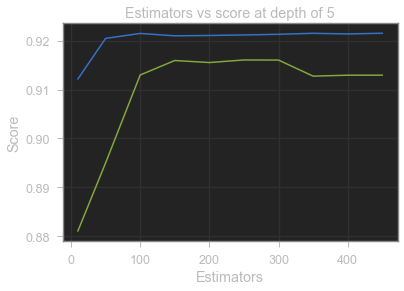

In [13]:
estimators = [10,50,100,150,200,250,300,350,400,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.grid()
plt.title('Estimators vs score at depth of 5')
plt.show()

depth =  3 Train Score 0.8949683577134558 test Score 0.8741908958653988
depth =  9 Train Score 0.9600040625634775 test Score 0.919639110365086
depth =  11 Train Score 0.9646705797674442 test Score 0.9258995815899582
depth =  15 Train Score 0.9774975321823566 test Score 0.9294102896309608
depth =  20 Train Score 0.9905086786395104 test Score 0.9304249717939075
depth =  35 Train Score 0.9999402319002272 test Score 0.9304908859332262
depth =  50 Train Score 0.9999501937463268 test Score 0.9303073325538668
depth =  70 Train Score 0.9999501937463268 test Score 0.9303073325538668
depth =  130 Train Score 0.9999501937463268 test Score 0.9303073325538668


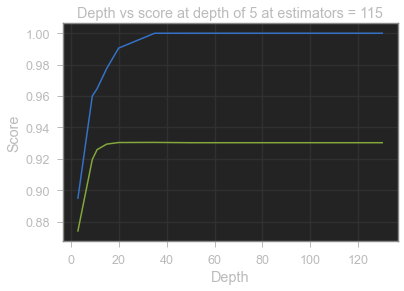

In [15]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.grid()
plt.show()

In [60]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(110,260),
              "max_depth": sp_randint(15,20),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])


mean test scores [0.96359505 0.9642404  0.96291151 0.96345878 0.96501413]


In [18]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=19, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=158, n_jobs=-1, random_state=25)


In [43]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=158, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [44]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [45]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9675581771170007
Test f1 score 0.9271144330542623


In [46]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


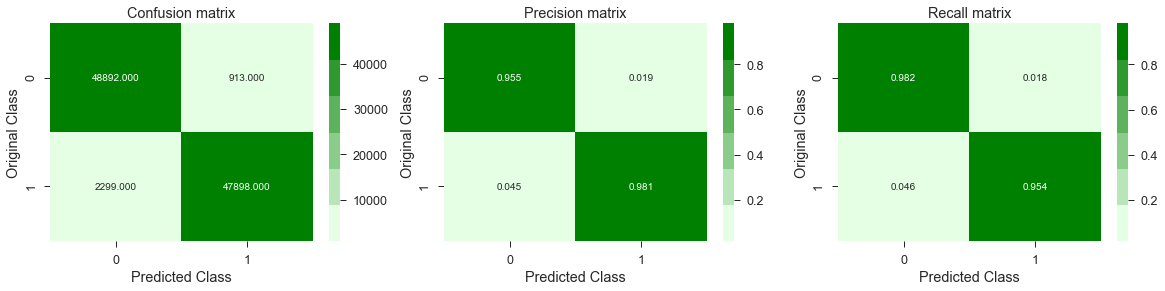

Test confusion_matrix


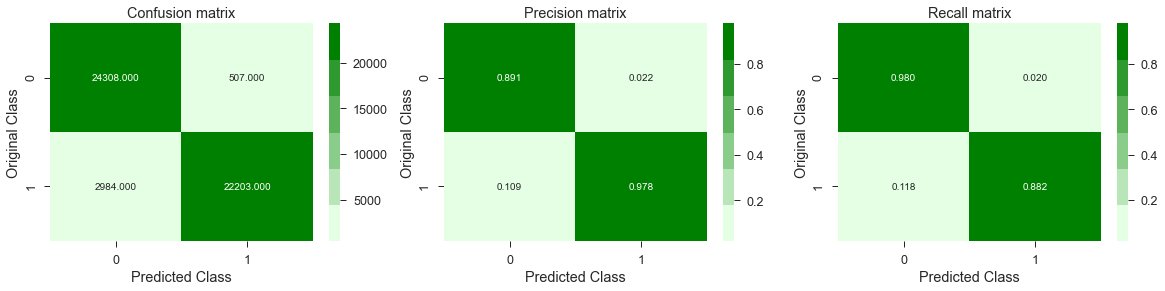

In [47]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

In [48]:
y_test_proba = clf.predict_proba(df_final_test)[:,1]
y_test_proba

array([0.99848365, 1.        , 0.9321146 , ..., 0.30731932, 0.01034261,
       0.01942143])

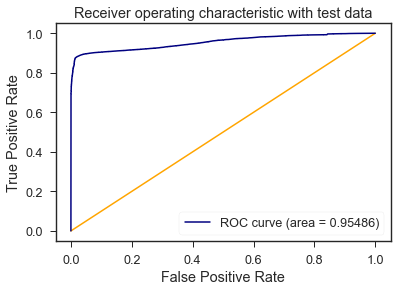

In [49]:
from sklearn.metrics import roc_curve, auc
sns.set_style("ticks")
fpr,tpr,ths = roc_curve(y_test,y_test_proba)
auc_sc = auc(fpr, tpr)
plt.plot([0,1],[0,1],color="orange")
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.5f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

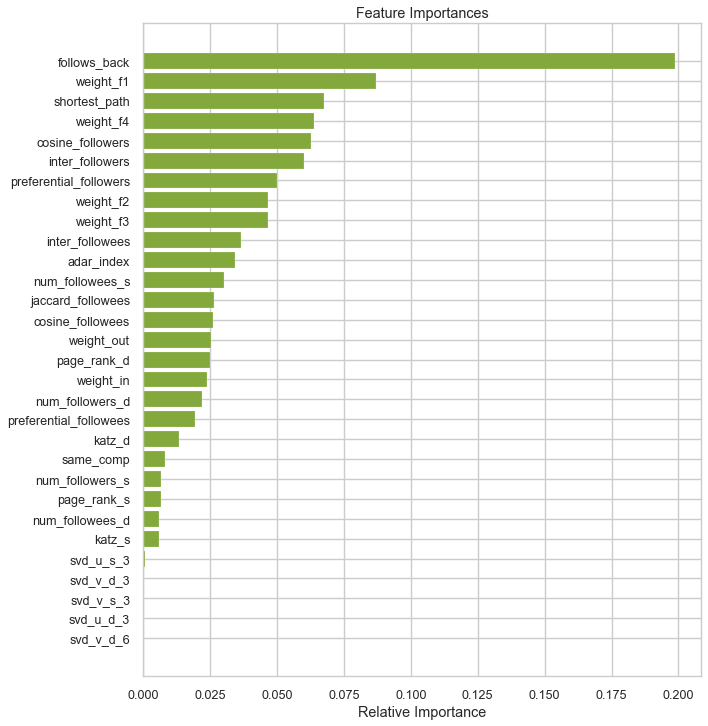

In [53]:
sns.set_style("whitegrid")
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### xgboost

In [117]:
from xgboost import XGBClassifier
clf = XGBClassifier(colsample_bytree=0.6, max_depth=6,
               n_estimators=72, random_state=42,n_jobs = -1,
               reg_lambda=0.0001)
clf.fit(df_final_train,y_train)
y_pred = clf.predict(df_final_test)
y_train_pred = clf.predict(df_final_train)

print("Train F1 Score : %f"%(f1_score(y_train,y_train_pred)))
print("Train F1 Score : %f"%(f1_score(y_test,y_pred)))

Train F1 Score : 0.988725
Train F1 Score : 0.926779


## LightGBM

In [54]:
from lightgbm import LGBMClassifier

Estimators =  10 Train Score 0.9300520844227833 test Score 0.9248535564853557
Estimators =  50 Train Score 0.9725699873896596 test Score 0.9312862133160416
Estimators =  100 Train Score 0.9766888245559175 test Score 0.9306045340050378
Estimators =  150 Train Score 0.9808944111876855 test Score 0.9299502194963137
Estimators =  200 Train Score 0.9840833090649822 test Score 0.9286405520259183
Estimators =  250 Train Score 0.9869533388822592 test Score 0.9271138254185533
Estimators =  300 Train Score 0.9893627676836475 test Score 0.9262842808659542
Estimators =  350 Train Score 0.9918255040272149 test Score 0.9249968326365133
Estimators =  400 Train Score 0.9940341164596429 test Score 0.9231192233666801
Estimators =  450 Train Score 0.9956666733230825 test Score 0.920051757418917


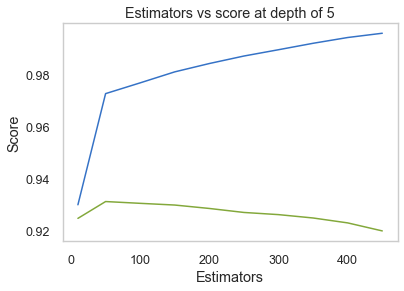

In [55]:
estimators = [10,50,100,150,200,250,300,350,400,450]
train_scores = []
test_scores = []
for i in estimators:
    lgbm = LGBMClassifier(
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None, n_estimators=i, n_jobs=-1,random_state=25)
    lgbm.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,lgbm.predict(df_final_train))
    test_sc = f1_score(y_test,lgbm.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.grid()
plt.title('Estimators vs score at depth of 5')
plt.show()

depth =  2 Train Score 0.9320868390983691 test Score 0.9208624075544227
depth =  3 Train Score 0.9638856564634454 test Score 0.9241983117943993
depth =  4 Train Score 0.9666026483372081 test Score 0.9265955220757481
depth =  5 Train Score 0.9725699873896596 test Score 0.9312862133160416
depth =  6 Train Score 0.9740112536938833 test Score 0.9326366154621002
depth =  7 Train Score 0.9753100122087801 test Score 0.931645251220995
depth =  8 Train Score 0.9763030309139107 test Score 0.931371315977026
depth =  10 Train Score 0.9776224621334193 test Score 0.9291808515109485
depth =  15 Train Score 0.9784382577548822 test Score 0.9297099775290337
depth =  20 Train Score 0.9782155901914815 test Score 0.9296981663130921


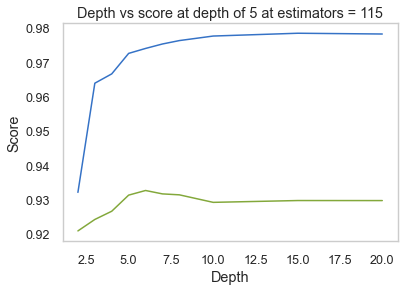

In [72]:
depths = [2,3,4,5,6,7,8,10,15,20]
train_scores = []
test_scores = []
for i in depths:
    lgbm = LGBMClassifier(max_depth=i, n_estimators=50, n_jobs=-1,random_state=25)
    lgbm.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,lgbm.predict(df_final_train))
    test_sc = f1_score(y_test,lgbm.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.grid()
plt.show()

In [83]:
param_dist = {"n_estimators":sp_randint(40,80),
              "reg_aplha":np.array([0,1e-5,1e-4,1e-3,1e-2,0.1,1,10]),
              "colsample_bytree":np.array([0.5,0.6,0.7,0.8,0.9,1]),
              "subsample":np.array([0.5,0.6,0.7,0.8,0.9,1]),
              "reg_lambda":np.array([1e-5,1e-4,1e-3,1e-2,0.1,1,10,100]),
              "min_child_samples": sp_randint(25,65)}

clf1 = LGBMClassifier(boosting_type = "gbdt",max_depth = 6,n_jobs =-1,random_state = 42)

lgbm_random = RandomizedSearchCV(clf1, param_distributions=param_dist,
                                   n_iter=10,cv=5,scoring='f1',random_state=42)

lgbm_random.fit(df_final_train,y_train)
print('mean test scores',lgbm_random.cv_results_['mean_test_score'])


mean test scores [0.97400231 0.97439253 0.97556397 0.97461751 0.97559193 0.97461284
 0.9743705  0.97527837 0.97516343 0.9742323 ]


In [84]:
lgbm_random.best_estimator_

LGBMClassifier(colsample_bytree=0.6, max_depth=6, min_child_samples=45,
               n_estimators=72, random_state=42, reg_aplha=0.001,
               reg_lambda=0.0001)

In [85]:
lgbm_clf = LGBMClassifier(colsample_bytree=0.6, max_depth=6, min_child_samples=45,
               n_estimators=72, random_state=42, reg_aplha=0.001,
               reg_lambda=0.0001)

In [123]:
lgbm_clf.fit(df_final_train,y_train)
y_tr_pred = lgbm_clf.predict(df_final_train)
y_tst_pred = lgbm_clf.predict(df_final_test)
print("Train F1 score : ",f1_score(y_train,y_tr_pred))
print("Test F1 Score : ",f1_score(y_test,y_tst_pred))
print("Test Accuracy Score : ",accuracy_score(y_test,y_tst_pred))

Train F1 score :  0.9764753354181378
Test F1 Score :  0.932145477413269
Test Accuracy Score :  0.9352625894964202


In [120]:
print(classification_report(y_test,y_tst_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     24815
           1       0.99      0.88      0.93     25187

    accuracy                           0.94     50002
   macro avg       0.94      0.94      0.94     50002
weighted avg       0.94      0.94      0.94     50002



In [87]:
y_pred_proba = lgbm_clf.predict_proba(df_final_test)[:,1]
auc = roc_auc_score(y_test,y_pred_proba)
print(auc)

0.953280898732408


train confusion matrix


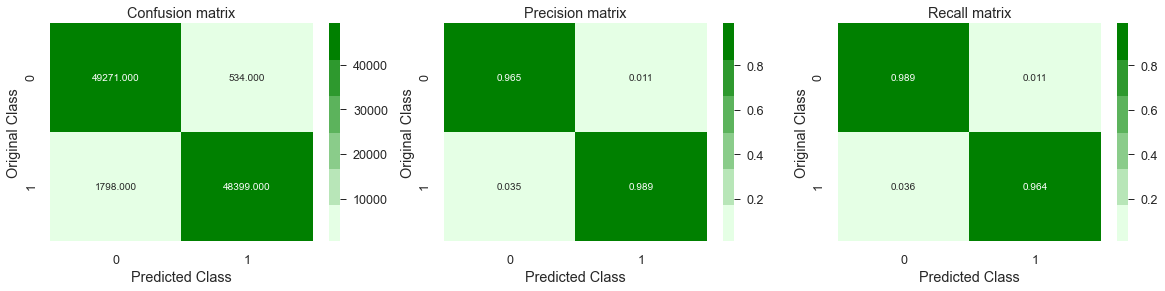

test confusion matrix


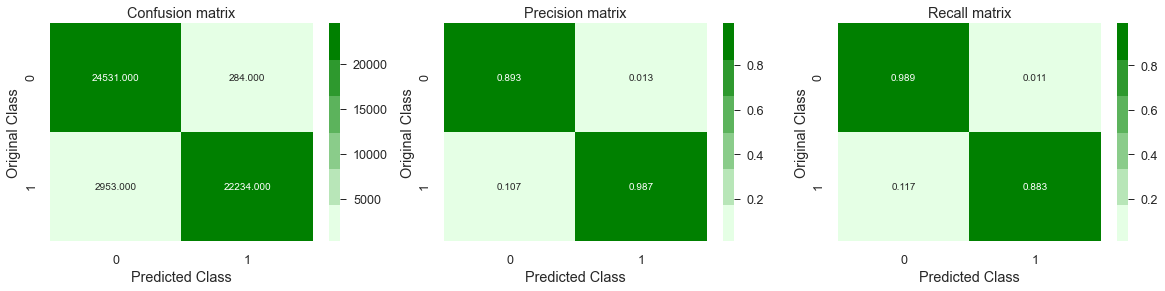

In [88]:
print("train confusion matrix")
plot_confusion_matrix(y_train,y_tr_pred)
print("test confusion matrix")
plot_confusion_matrix(y_test,y_tst_pred)

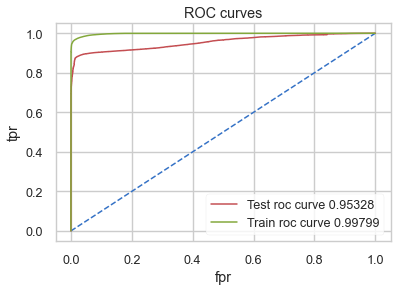

In [96]:
sns.set_style("whitegrid")
fpr,tpr,th = roc_curve(y_test,y_test_proba)
fpr1,tpr1,th1 = roc_curve(y_train,lgbm_clf.predict_proba(df_final_train)[:,1])
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,'r',label ="Test roc curve %.5f"%(auc),)
plt.plot(fpr1,tpr1,'g',label = "Train roc curve %.5f"%(roc_auc_score(y_train,(lgbm_clf.predict_proba(df_final_train)[:,1]))))
plt.legend()
plt.title('ROC curves')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()


#### feature importances

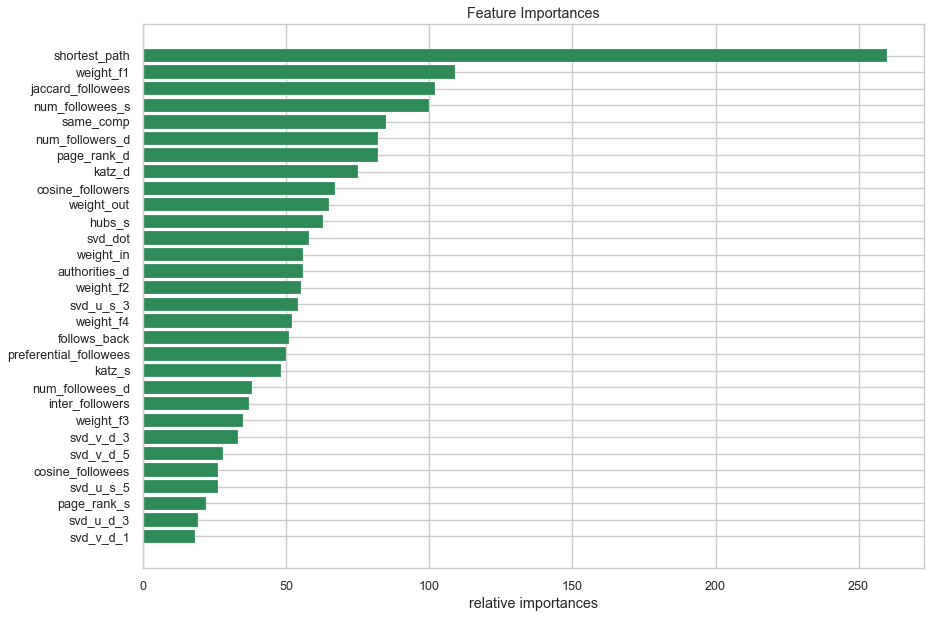

In [124]:
features = df_final_train.columns
importances = lgbm_clf.feature_importances_
indices = np.argsort(importances)[-30:]
plt.figure(figsize=(14,10))
plt.barh(range(len(indices)),importances[indices],color = "seagreen",align = "center")
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("relative importances")
plt.title("Feature Importances")
plt.show()
